In [133]:
# Import Modules
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

In [134]:
# Load the Data
raw_Data= pd.read_excel('v2_BMED_data.xlsx',sheet_name='Opt')

# Data Grouping
group_checker = list(raw_Data[['V','E','Ci']].iloc[0])
group_index = []
for i in range(len(raw_Data)):
    if not group_checker == list(raw_Data[['V','E','Ci']].iloc[i]):
        group_index.append(i)
        group_checker = list(raw_Data[['V','E','Ci']].iloc[i])

# MB data
MB_Data = raw_Data[['T','V','E','Ci','t','CF','CA']]

In [135]:
# Set the training data
X = MB_Data[['T','V','E','Ci','t']].values
Y = MB_Data[['CF']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Yt = torch.FloatTensor(Y)

#Declare the Custom Models
class CustomModel_CF(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,10),
            nn.ReLU(),
            nn.Linear(10,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,10),
            nn.ReLU(),
            nn.Linear(10,1),
            
        )

    # def forward(self, x):
    #     t = x[:,4].unsqueeze(1)
    #     C0 = x[:,3].unsqueeze(1)
    #     a0 = self.hidden(x)#.chunk(5, dim=1)
    #     k = a0[0]**2
    #     res = C0*torch.exp(-k*t)
    #     return res

    def forward(self, x):
        return self.hidden(x)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
iter = 0
scores = []


for train_index, test_index in kfold.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    Y_train, Y_test = Yt[train_index], Yt[test_index]
    
    # NN model initialization
    model_CF = CustomModel_CF()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_CF.parameters(), lr = 0.001)

    # Learning Loop
    num_epochs = 20000
    
    for epoch in range(num_epochs):
        # forward_propagation
        y_pred = model_CF(X_train)
        loss = criterion(y_pred,Y_train)

        # back_propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 2000 == 0:
            print(f'iter : {iter+1}, epoch: {epoch}, loss: {loss.item()}')
    yp = model_CF(X_test).detach().numpy()
    Y_test = Y_test.detach().numpy()
    mse_score = mean_squared_error(Y_test,yp)
    scores.append(mse_score)
    iter += 1
print(sum(scores) / len(scores))

iter : 1, epoch: 0, loss: 3.804176092147827
iter : 1, epoch: 2000, loss: 0.08664563298225403
iter : 1, epoch: 4000, loss: 0.08118855953216553
iter : 1, epoch: 6000, loss: 0.07333675026893616
iter : 1, epoch: 8000, loss: 0.050072770565748215
iter : 1, epoch: 10000, loss: 0.03581542149186134
iter : 1, epoch: 12000, loss: 0.031949128955602646
iter : 1, epoch: 14000, loss: 0.03357544541358948
iter : 1, epoch: 16000, loss: 0.02863783948123455
iter : 1, epoch: 18000, loss: 0.02464401163160801
iter : 2, epoch: 0, loss: 3.157172441482544
iter : 2, epoch: 2000, loss: 0.049698106944561005
iter : 2, epoch: 4000, loss: 0.03198510408401489
iter : 2, epoch: 6000, loss: 0.023195968940854073
iter : 2, epoch: 8000, loss: 0.02022070437669754
iter : 2, epoch: 10000, loss: 0.019607670605182648


Epoch [1000/100000], Loss: 0.056233
Epoch [2000/100000], Loss: 0.044883
Epoch [3000/100000], Loss: 0.033428
Epoch [4000/100000], Loss: 0.027874
Epoch [5000/100000], Loss: 0.023929
Epoch [6000/100000], Loss: 0.021412
Epoch [7000/100000], Loss: 0.019866
Epoch [8000/100000], Loss: 0.019981
Epoch [9000/100000], Loss: 0.019188
Epoch [10000/100000], Loss: 0.018474
Epoch [11000/100000], Loss: 0.017784
Epoch [12000/100000], Loss: 0.015902
Epoch [13000/100000], Loss: 0.015436
Epoch [14000/100000], Loss: 0.014580
Epoch [15000/100000], Loss: 0.019812
Epoch [16000/100000], Loss: 0.014720
Epoch [17000/100000], Loss: 0.014104
Epoch [18000/100000], Loss: 0.015117
Epoch [19000/100000], Loss: 0.013614
Epoch [20000/100000], Loss: 0.017082
Epoch [21000/100000], Loss: 0.017129
Epoch [22000/100000], Loss: 0.016765
Epoch [23000/100000], Loss: 0.015461
Epoch [24000/100000], Loss: 0.015778
Epoch [25000/100000], Loss: 0.014240
Epoch [26000/100000], Loss: 0.014308
Epoch [27000/100000], Loss: 0.013626
Epoch [280

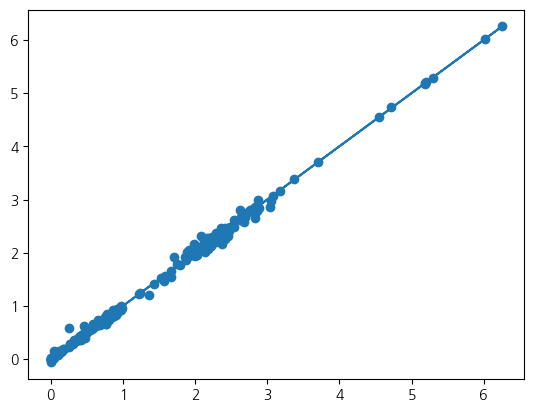

In [132]:
model_CF = CustomModel_CF()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_CF.parameters(), lr = 0.001)

# Learning Loop
num_epochs = 200000
losses = []

for epoch in range(num_epochs):
    # forward_propagation
    y_pred = model_CF(Xt)
    loss = criterion(y_pred,Yt)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')



y_pred2 = model_CF(Xt)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [111]:
torch.save(model_CF.state_dict(), 'model_CF.pth')

In [112]:
# Set the training data
X = MB_Data[['T','V','E','Ci','t']].values
Y = MB_Data[['CA']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Yt = torch.FloatTensor(Y)

# Declare the Custom Models
class CustomModel_CA(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,10),
            nn.ReLU(),
            nn.Linear(10,5),
            nn.ReLU(),
            nn.Linear(5,1)
        )

    def forward(self, x):
        t = x[:,4].unsqueeze(1)
        C0 = x[:,3].unsqueeze(1)
        a0= self.hidden(x).chunk(5, dim=1)

        k = a0[0]**2


        return C0*(1-torch.exp(-k*t))

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
iter = 0
scores = []
for train_index, test_index in kfold.split(Xt):
    X_train, X_test = Xt[train_index], Xt[test_index]
    Y_train, Y_test = Yt[train_index], Yt[test_index]
    
    # NN model initialization
    model_CA = CustomModel_CA()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_CA.parameters(), lr = 0.0001)

    # Learning Loop
    num_epochs = 20000
    
    for epoch in range(num_epochs):
        # forward_propagation
        y_pred = model_CA(X_train)
        loss = criterion(y_pred,Y_train)

        # back_propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 2000 == 0:
            print(f'iter : {iter+1}, epoch: {epoch}, loss: {loss.item()}')
    yp = model_CA(X_test).detach().numpy()
    Y_test = Y_test.detach().numpy()
    mse_score = mean_squared_error(Y_test,yp)
    scores.append(mse_score)
    iter += 1
print(sum(scores) / len(scores))



        

iter : 1, epoch: 0, loss: 2.749002695083618
iter : 1, epoch: 2000, loss: 0.08057046681642532
iter : 1, epoch: 4000, loss: 0.068254254758358
iter : 1, epoch: 6000, loss: 0.053993165493011475
iter : 1, epoch: 8000, loss: 0.03773282468318939
iter : 1, epoch: 10000, loss: 0.022811025381088257
iter : 1, epoch: 12000, loss: 0.021365100517868996
iter : 1, epoch: 14000, loss: 0.020946724340319633
iter : 1, epoch: 16000, loss: 0.02028871327638626
iter : 1, epoch: 18000, loss: 0.019544726237654686
iter : 2, epoch: 0, loss: 1.8197194337844849
iter : 2, epoch: 2000, loss: 0.1801798939704895
iter : 2, epoch: 4000, loss: 0.17940641939640045
iter : 2, epoch: 6000, loss: 0.17935185134410858
iter : 2, epoch: 8000, loss: 0.17927516996860504
iter : 2, epoch: 10000, loss: 0.17915496230125427
iter : 2, epoch: 12000, loss: 0.17896099388599396
iter : 2, epoch: 14000, loss: 0.1788676381111145
iter : 2, epoch: 16000, loss: 0.1782994121313095
iter : 2, epoch: 18000, loss: 0.17826588451862335
iter : 3, epoch: 0,

Epoch [2000/20000], Loss: 0.036257
Epoch [4000/20000], Loss: 0.025670
Epoch [6000/20000], Loss: 0.023446
Epoch [8000/20000], Loss: 0.022679
Epoch [10000/20000], Loss: 0.021512
Epoch [12000/20000], Loss: 0.021160
Epoch [14000/20000], Loss: 0.021147
Epoch [16000/20000], Loss: 0.021134
Epoch [18000/20000], Loss: 0.021125
Epoch [20000/20000], Loss: 0.021115


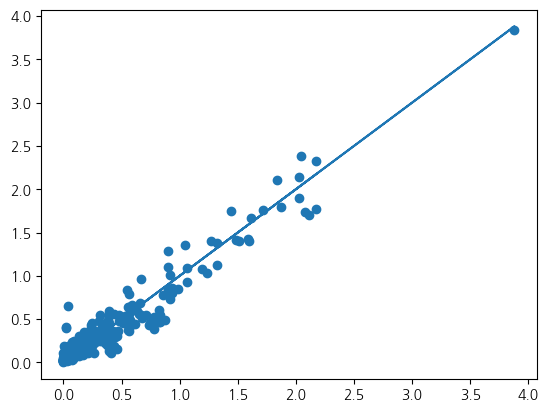

In [113]:

# NN model initialization
model_CA = CustomModel_CA()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_CA.parameters(), lr = 0.0001)

# Learning Loop
num_epochs = 20000
losses = []

for epoch in range(num_epochs):
    # forward_propagation
    y_pred = model_CA(Xt)
    loss = criterion(y_pred,Yt)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 2000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

    y_pred2 = model_CA(Xt)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [114]:
torch.save(model_CA.state_dict(), 'model_CA.pth')